In [7]:
import numpy as np
import pandas as pd 
from sklearn.svm import SVC , SVR
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.metrics import accuracy_score


# Kernel Trick

In [2]:
X , y = make_circles(n_samples=1000 , factor=0.1 , noise=0.1)

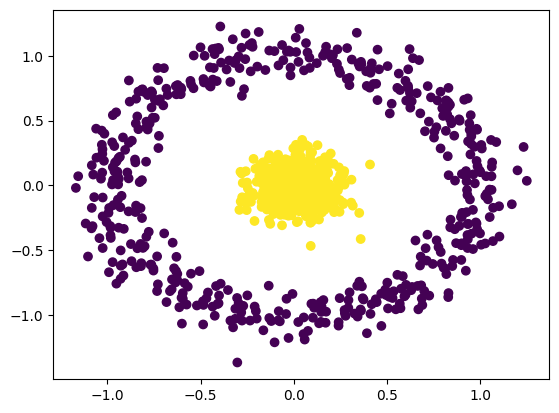

In [3]:
plt.scatter(X[:,0] , X[:,1] , c=y )
plt.show()

In [4]:
# This is non-linear data , cant be seperated with liner svm , either we need 
# Radial basis function (RBF) or poly having degree >=2 
# we set this hyperparameter as kernal = "RBF" or "poly" , and degree = 2 ,3 ,4 if 
# kernel = 'poly'
# by doing so we transform our data in higher dimension so that they can become linearliy 
# seperable in higher space 

In [5]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=21)

In [6]:
clf = SVC(kernel='linear')  # This is just soft margin svm , no transformation in data
clf.fit(X_train , y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [8]:

y_pred = clf.predict(X_test)
print("accuracy" ,accuracy_score(y_test , y_pred))
# Obviously we will not get good accuracy , beacuse we trying to learn linear decision noundary

accuracy 0.675


In [9]:
from matplotlib.colors import ListedColormap

zero_one_colourmap = ListedColormap(('blue', 'red'))
def plot_decision_boundary(X, y, clf):
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
                                 stop = X_set[:, 0].max() + 1, 
                                 step = 0.01),
                       np.arange(start = X_set[:, 1].min() - 1, 
                                 stop = X_set[:, 1].max() + 1, 
                                 step = 0.01))
  
    plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), 
                                             X2.ravel()]).T).reshape(X1.shape),
               alpha = 0.75, 
               cmap = zero_one_colourmap)
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = (zero_one_colourmap)(i), label = j)
    plt.title('SVM Decision Boundary')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    return plt.show()

C:\Users\Jayhind\AppData\Local\Temp\ipykernel_8160\2317658454.py:20: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


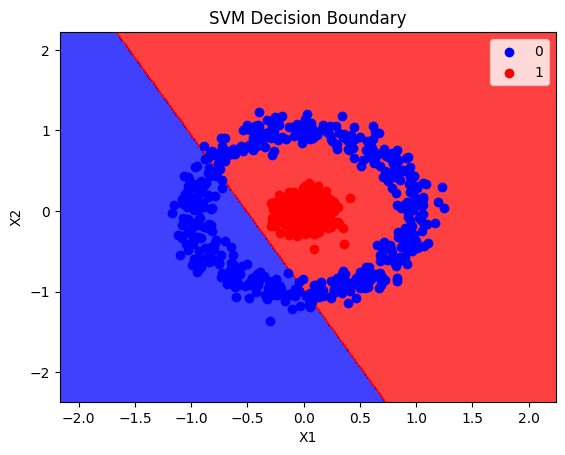

In [10]:
plot_decision_boundary(X, y , clf)

Now Lets Understand How Kernel Trick help to transform the data in higher dimension so that \
it can become linearly separble 

In [ ]:
# Radial Basis function 
# r = exp(-x**2)+exp(-y**2)  # for 2d data , for n dimensional it will be added upto xn
# this is called RBF Kernal cenetred at origin , if not centered at origin then exp(-(x-2)**2)+exp(-(y+2)**2)
# now cenetred at (2,-2)
# what it will do , it will just pull all the data which is centerd at origin on z axis 
# it will pull other values also near to origin

def plot_3d_plot(X, y):
    r = np.exp(-(X ** 2).sum(1))
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=100, cmap='bwr')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('y')
    return ax

<Axes3D: xlabel='X1', ylabel='X2', zlabel='y'>

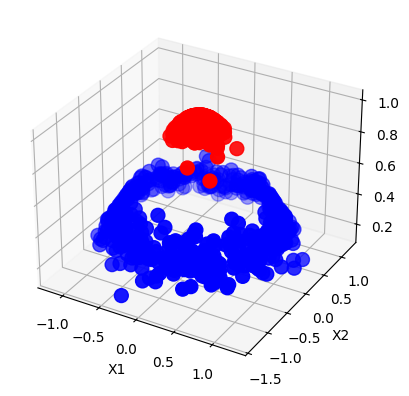

In [13]:
plot_3d_plot(X,y)

In [14]:
rbf_clf = SVC(kernel='rbf')
rbf_clf.fit(X_train , y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [15]:
y_pred_rbf = rbf_clf.predict(X_test)
print("accuracy_score" , accuracy_score(y_test , y_pred_rbf))

accuracy_score 1.0


C:\Users\Jayhind\AppData\Local\Temp\ipykernel_8160\2317658454.py:20: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


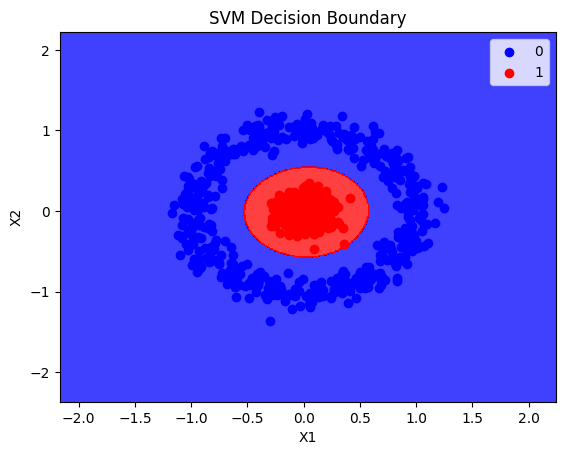

In [16]:
plot_decision_boundary(X , y , rbf_clf)

In [17]:
clf_poly = SVC(kernel='poly' , degree=2)
clf_poly.fit(X_train , y_train)

,C,1.0
,kernel,'poly'
,degree,2
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [18]:
y_pred_poly = clf_poly.predict(X_test)
print("accuracy_score" , accuracy_score(y_test ,y_pred_poly))

accuracy_score 1.0


C:\Users\Jayhind\AppData\Local\Temp\ipykernel_8160\2317658454.py:20: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


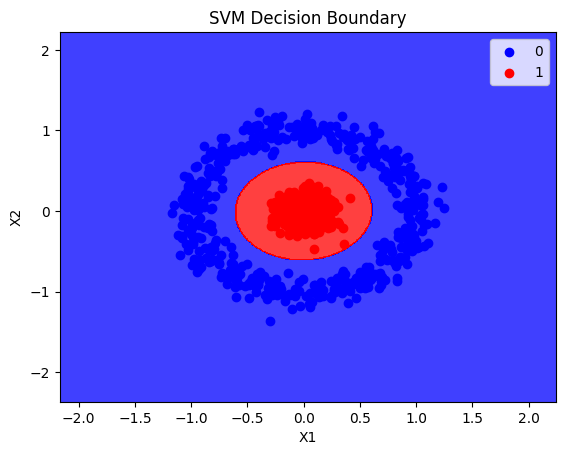

In [19]:
plot_decision_boundary(X , y , clf_poly)